### 1. Importing neccasary library

In [4]:
# Importing Neccasary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet #The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.

#Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')



from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### 2. Data Extraction and Cleaning

In [5]:
df=pd.read_csv("hate.csv",encoding='ISO-8859-1')

In [6]:
df.shape

(41144, 3)

In [7]:
df.head(5)

Unnamed: 0                                            comment label
0           1                                dalits are lowlives     N
1           2             gay people are a burden to our society     N
2           3                              Arabs are not welcome     N
3           4  I'm not saying we should actually eliminate he...     N
4           5                       bananas are for black people     N

In [8]:
df["label"].value_counts()

N    22175
P    18969
Name: label, dtype: int64

In [9]:
df.isnull().sum()

Unnamed: 0    0
comment       0
label         0
dtype: int64

In [10]:
df = df.drop('Unnamed: 0', axis=1)

In [11]:
df.describe()

comment  label
count                      41144  41144
unique                     41134      2
top     Blacks are such pondlife      N
freq                           5  22175

In [12]:
#converting target variable to numeric labels

label_encoder = LabelEncoder()

# Fit and transform the categorical data
df['label'] = label_encoder.fit_transform(df['label'])


In [13]:
df.tail()

comment  label
41139                     Indian culture is so backwards      0
41140  Women don't want equality, they just want to b...      0
41141                                         fuck covid      1
41142                           This computer is garbage      1
41143                 The only good Muslim is a dead one      0

In [14]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have","what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have", "y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [15]:
def clean_and_preprocess(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Handle contractions and abbreviations
    for contraction, expansion in mapping.items():
      text = re.sub(fr'\b{contraction}\b', expansion,text, flags=re.IGNORECASE)

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Apply lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Apply stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]


    # Join tokens back into a cleaned and preprocessed text
    cleaned_text = ' '.join(tokens)

    return cleaned_text

df['Cleaned Comments'] = df['comment'].apply(clean_and_preprocess)
df.head()

comment  label  \
0                                dalits are lowlives      0   
1             gay people are a burden to our society      0   
2                              Arabs are not welcome      0   
3  I'm not saying we should actually eliminate he...      0   
4                       bananas are for black people      0   

                                    Cleaned Comments  
0                                       dalit lowliv  
1                           gay peopl burden societi  
2                                        arab welcom  
3  im say actual elimin heeb wish natur becam ext...  
4                                 banana black peopl

In [16]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Comments'].apply(token_stop_pos)
df.head()

comment  label  \
0                                dalits are lowlives      0   
1             gay people are a burden to our society      0   
2                              Arabs are not welcome      0   
3  I'm not saying we should actually eliminate he...      0   
4                       bananas are for black people      0   

                                    Cleaned Comments  \
0                                       dalit lowliv   
1                           gay peopl burden societi   
2                                        arab welcom   
3  im say actual elimin heeb wish natur becam ext...   
4                                 banana black peopl   

                                          POS tagged  
0                          [(dalit, n), (lowliv, n)]  
1  [(gay, n), (peopl, n), (burden, n), (societi, n)]  
2                           [(arab, n), (welcom, n)]  
3  [(im, n), (say, v), (actual, a), (elimin, n), ...  
4              [(banana, a), (black, a), (peopl, n)]

### 3. Exploratory Data Analysis

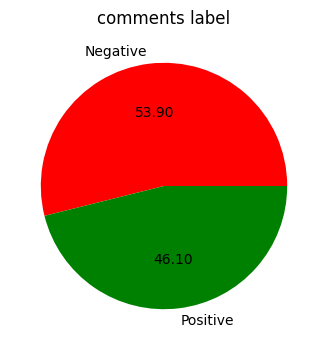

In [17]:
#visalization of Comments label

plt.figure(figsize=(5,4))
plt.pie(df['label'].value_counts(),labels=['Negative','Positive'],autopct='%0.2f',colors=["red","green"])
plt.title('comments label',size=12)
plt.show()

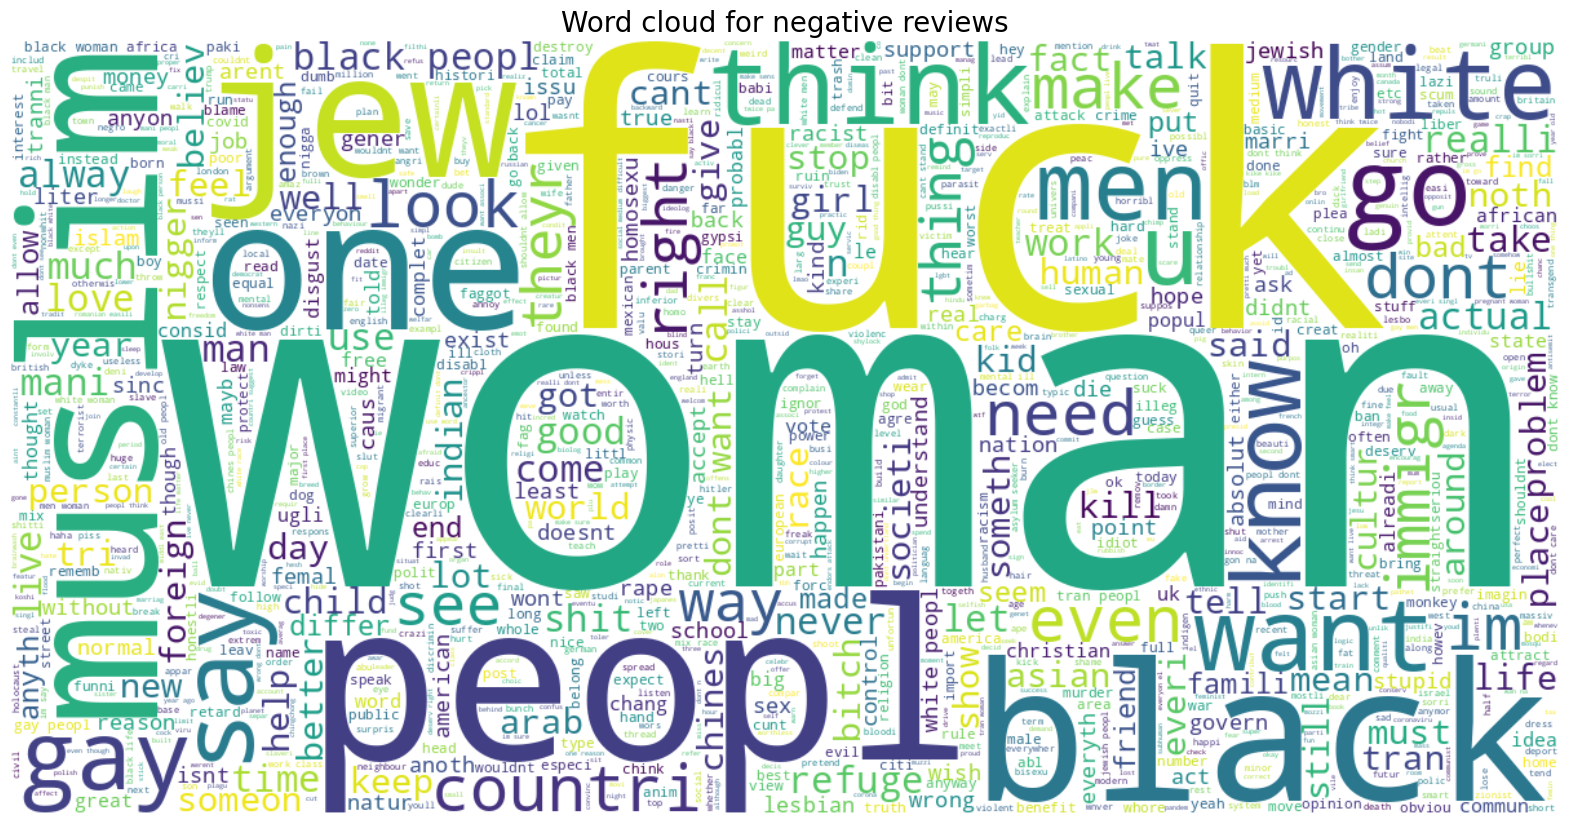

In [18]:
#word cloud for negative reviews
from wordcloud import WordCloud
negative_data = df[df.label == 0]['Cleaned Comments']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

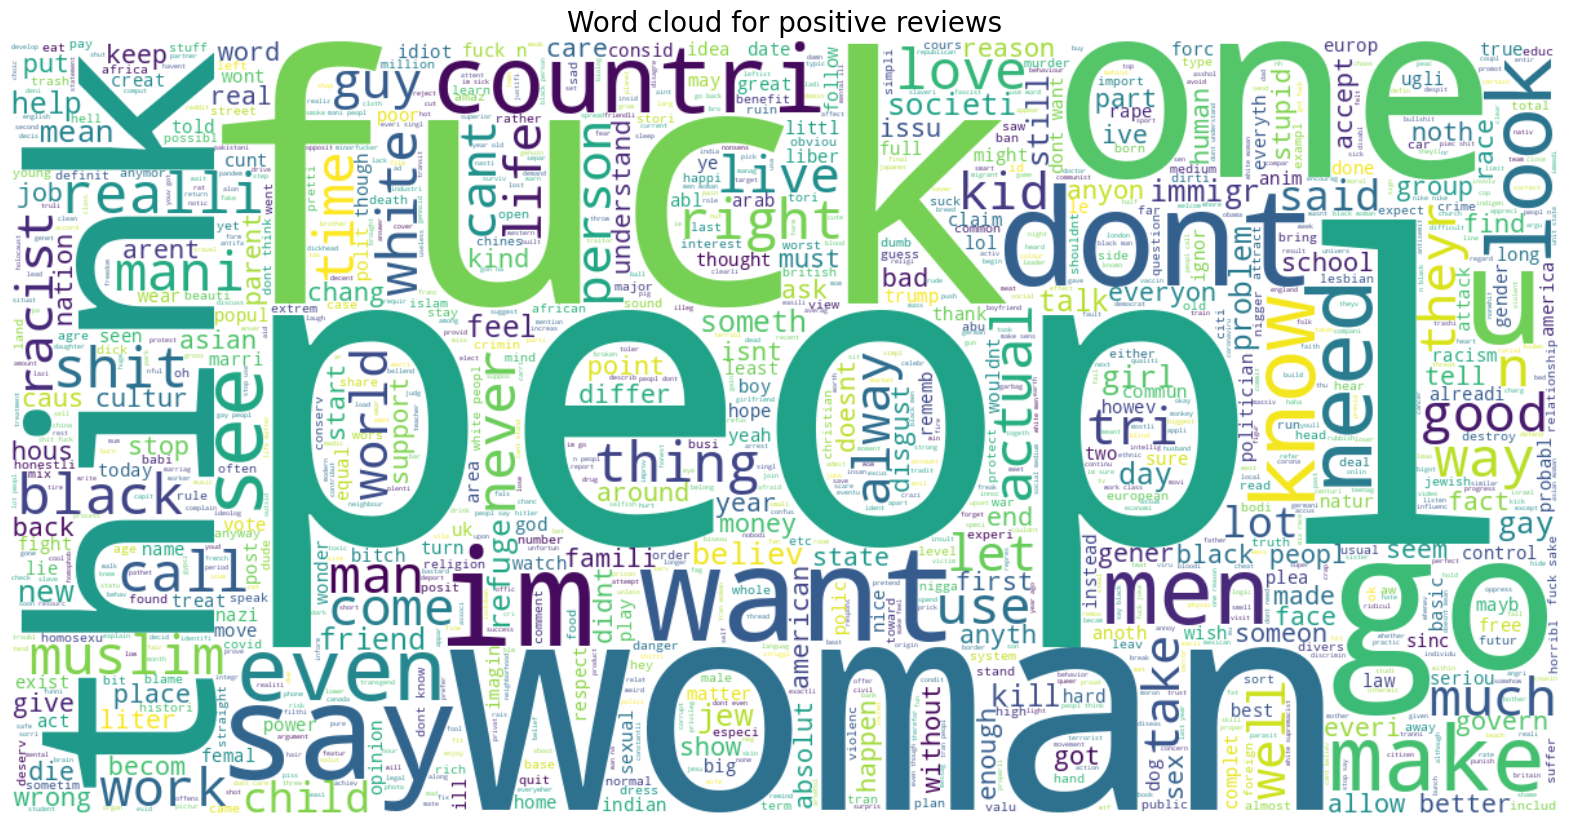

In [19]:
#word cloud for positive reviews
positive_data = df[df.label == 1]['Cleaned Comments']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

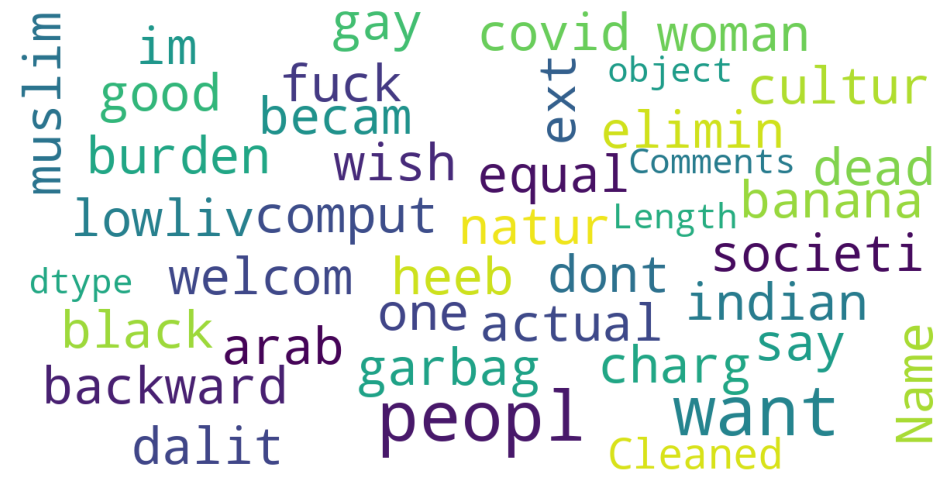

In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Cleaned Comments'])

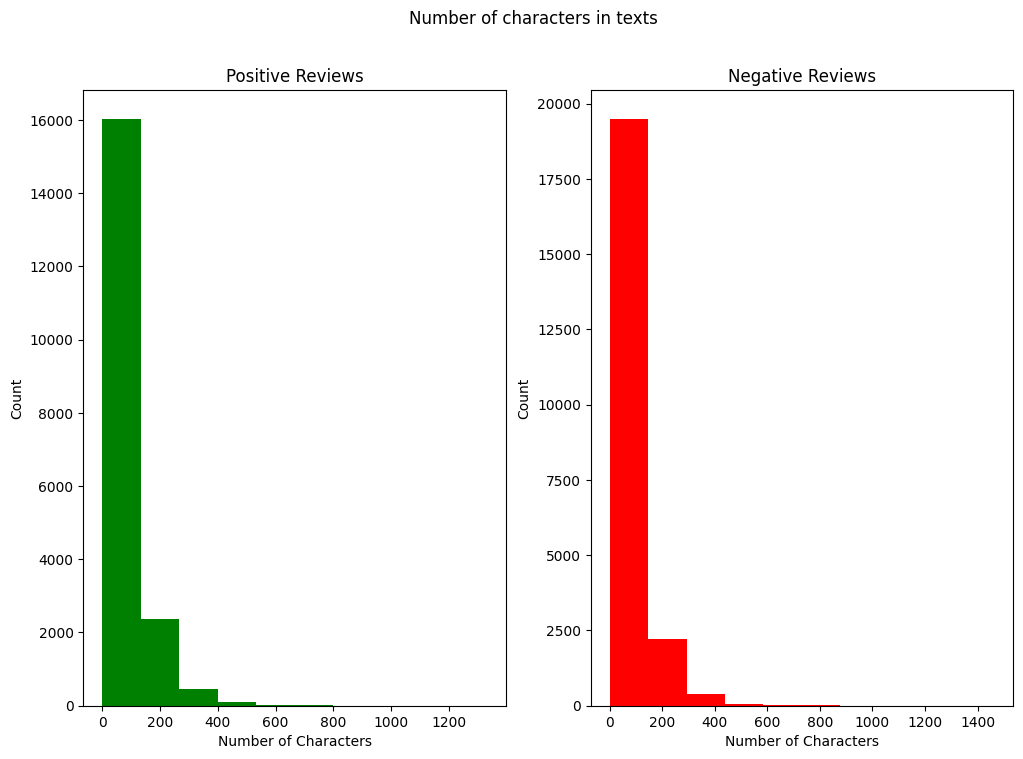

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=positive_data.str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Count')
text_len=negative_data.str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Count')
fig.suptitle('Number of characters in texts')
plt.show()

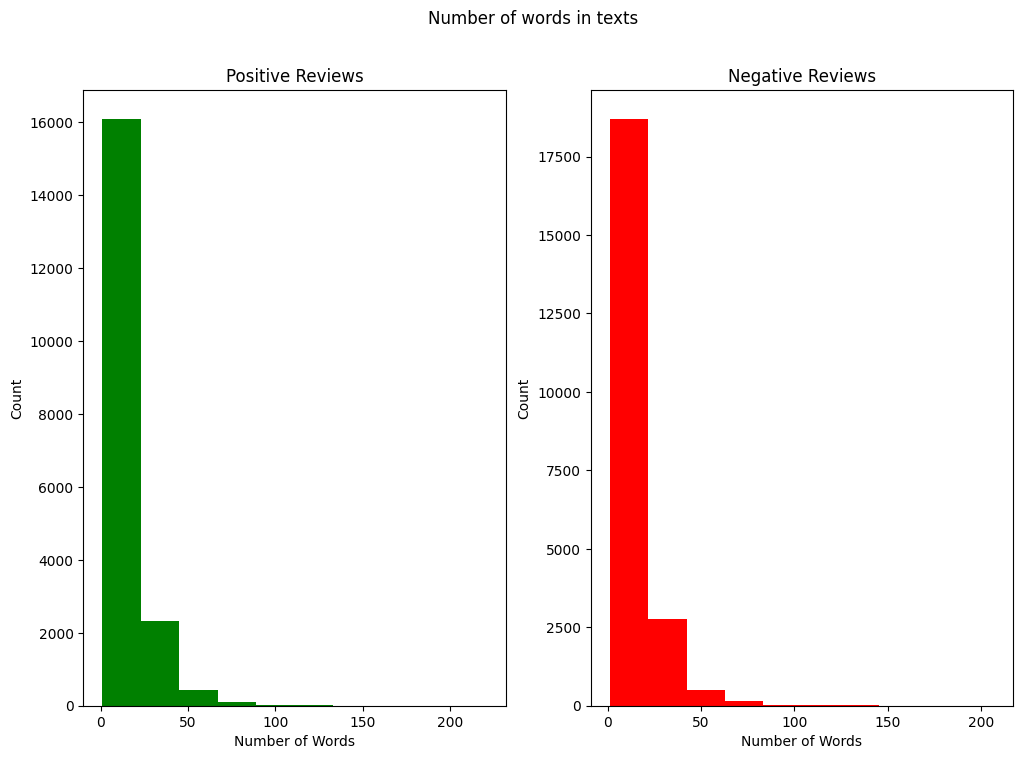

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len=positive_data.str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Count')
text_len=negative_data.str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Count')
fig.suptitle('Number of words in texts')
plt.show()

<ipython-input-23-644cadbc1484>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word, ax=ax1,color='green')
<ipython-input-23-644cadbc1484>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word,ax=ax2,color='red')


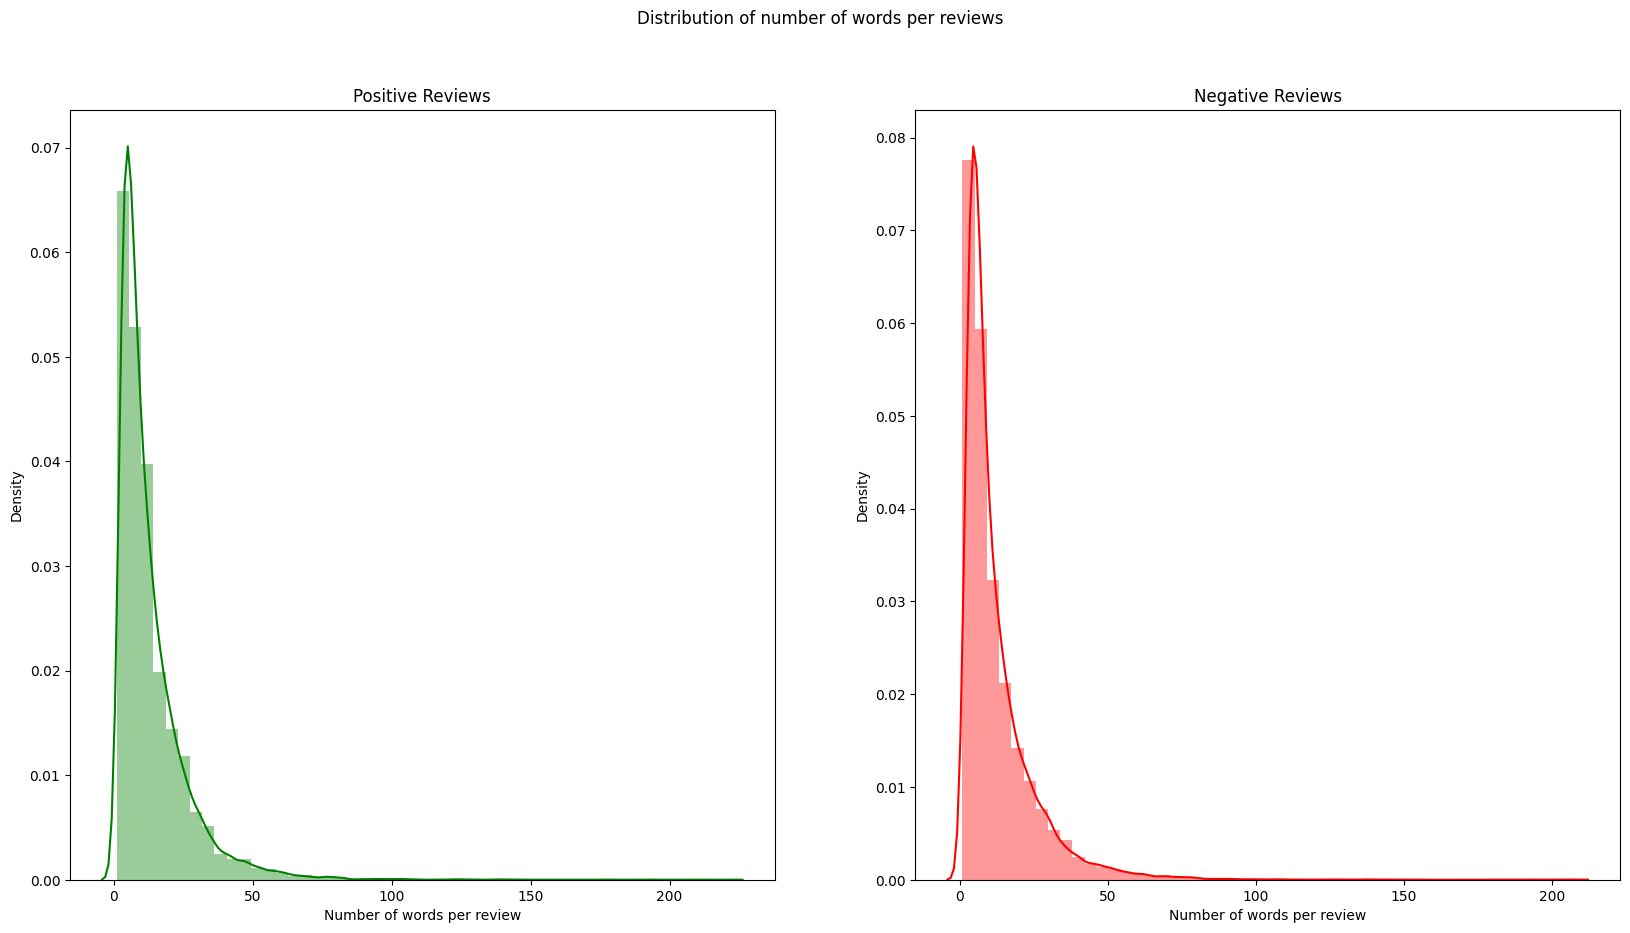

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : len(x) )
sns.distplot(word, ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of words per review')
word = negative_data.str.split().apply(lambda x :len(x) )
sns.distplot(word,ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of words per review')
fig.suptitle('Distribution of number of words per reviews')
plt.show()

<ipython-input-24-e72c0068c036>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1,color='green')
<ipython-input-24-e72c0068c036>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')


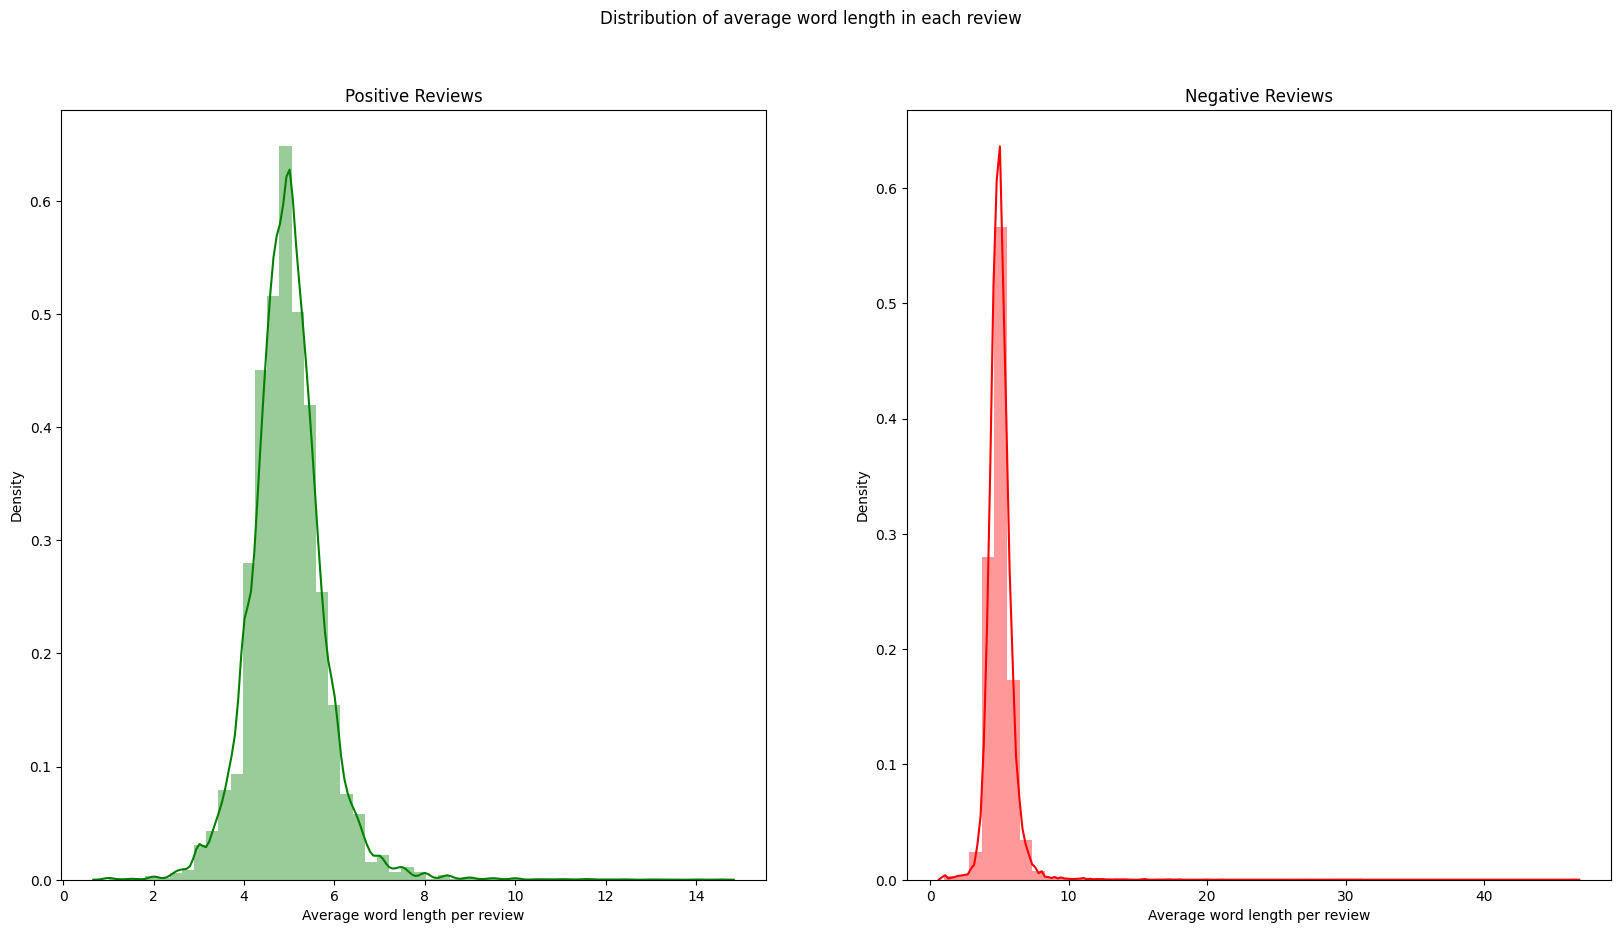

In [24]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Average word length per review')
word = negative_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Average word length per review')
fig.suptitle('Distribution of average word length in each review')
plt.show()

In [25]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df['Cleaned Comments'])
corpus[:5]

['dalit', 'lowliv', 'gay', 'peopl', 'burden']

In [26]:

counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
most_common

corpus  countv
0  peopl    8326
1  woman    5932
2   like    5439
3   fuck    5029
4  black    4225
5   dont    4194
6    get    3651
7  think    2927
8   want    2896
9  white    2675

In [27]:
most_common = most_common.sort_values('countv')

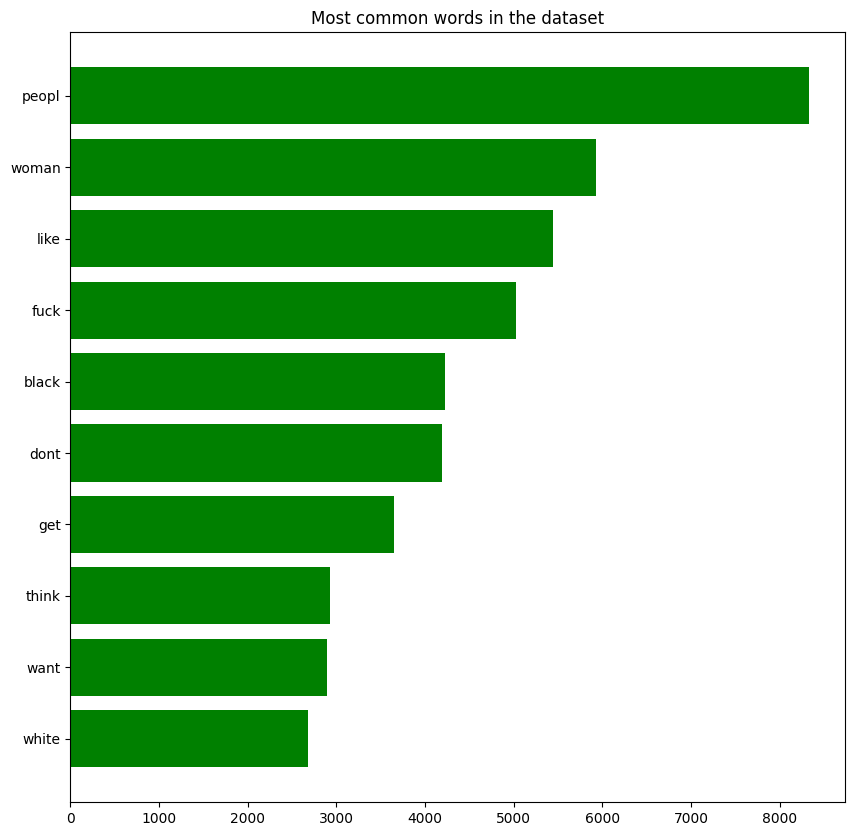

In [28]:
plt.figure(figsize =(10,10))
plt.yticks(range(len(most_common)), list(most_common.corpus))
plt.barh(range(len(most_common)), list(most_common.countv),align='center',color = 'green')
plt.title('Most common words in the dataset')
plt.show()

In [29]:

def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency
    return words_freq[:n]

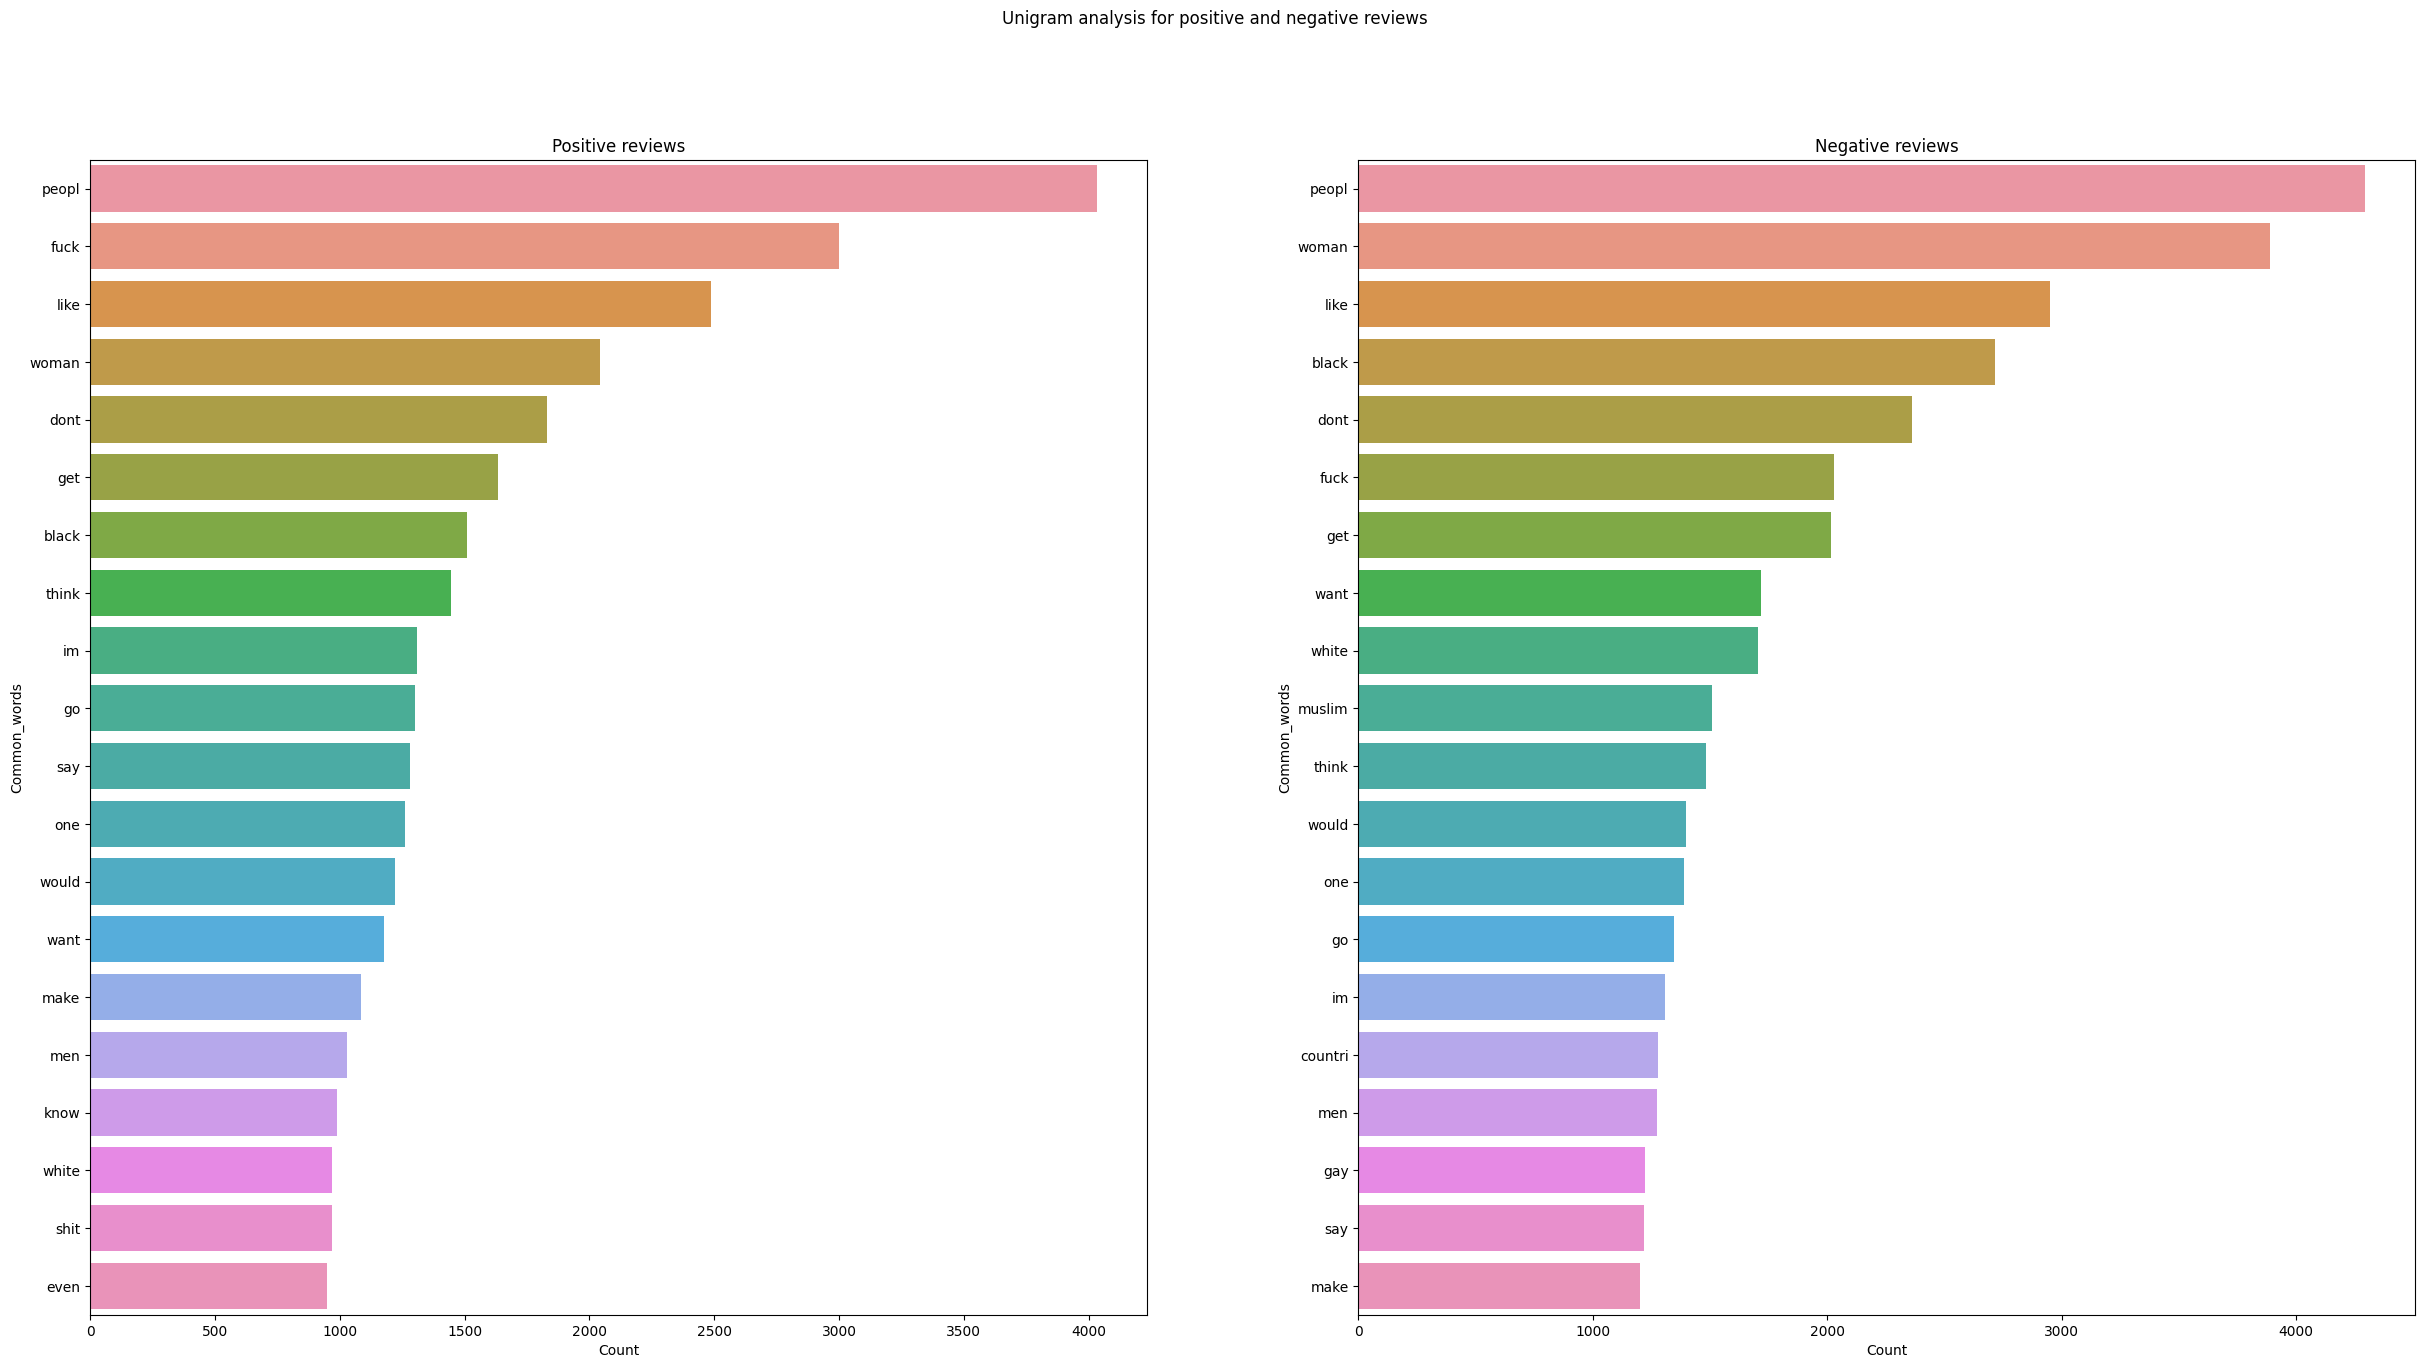

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()

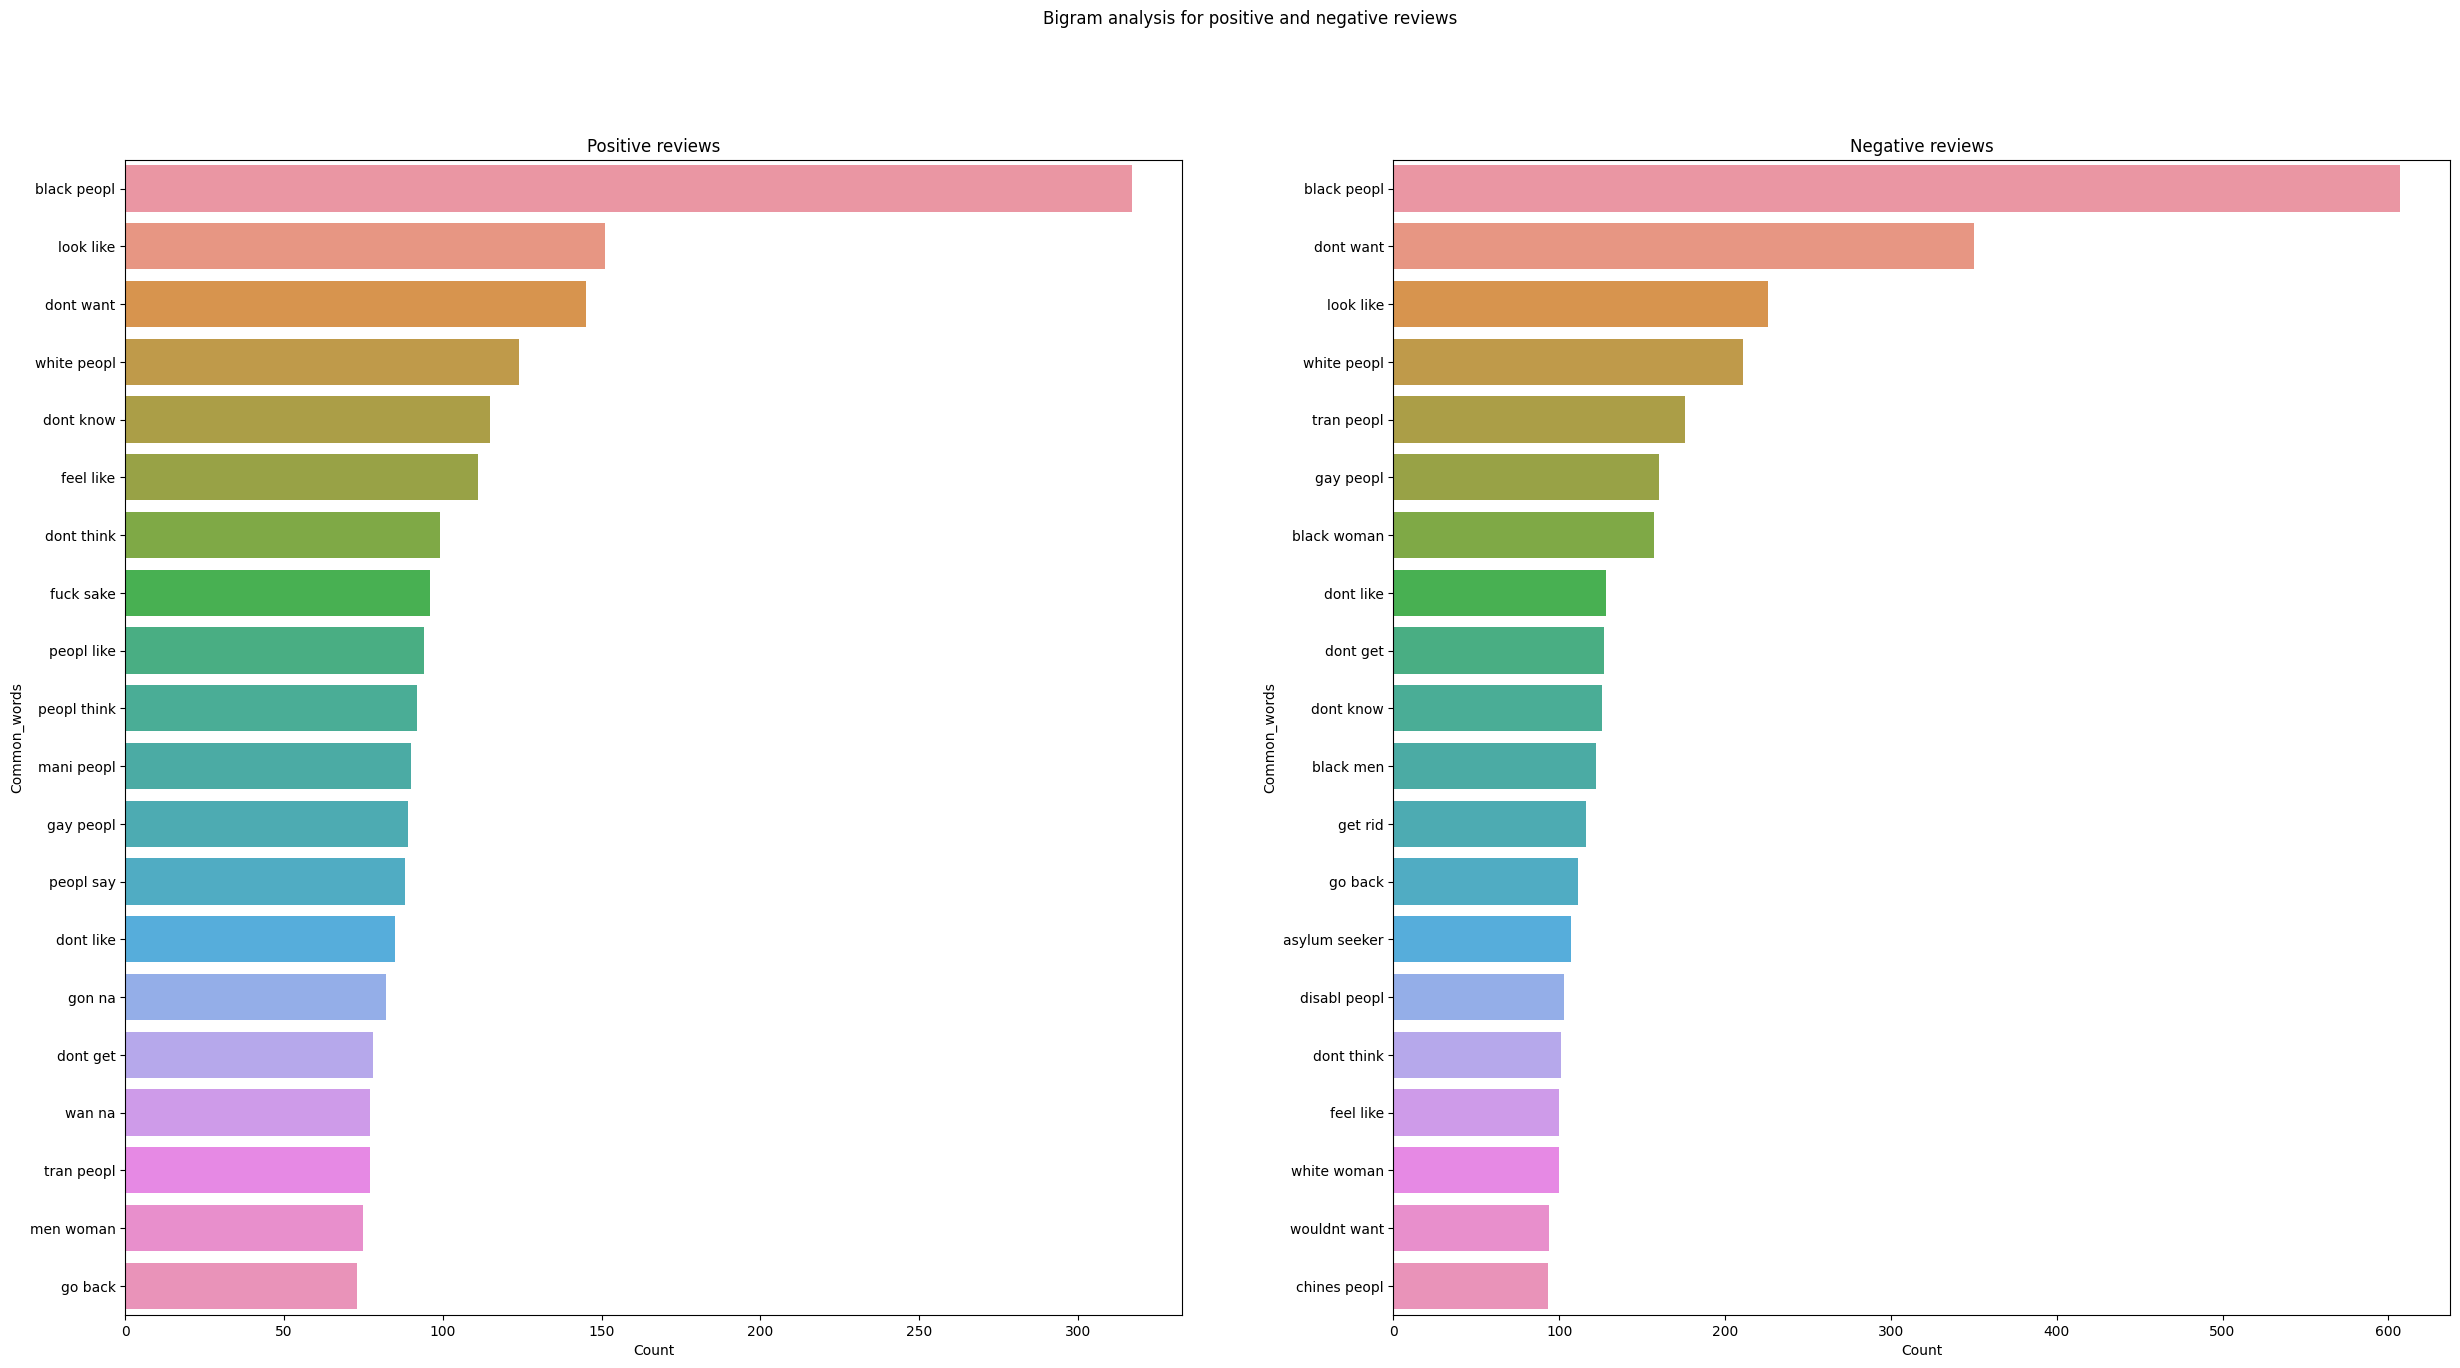

In [31]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

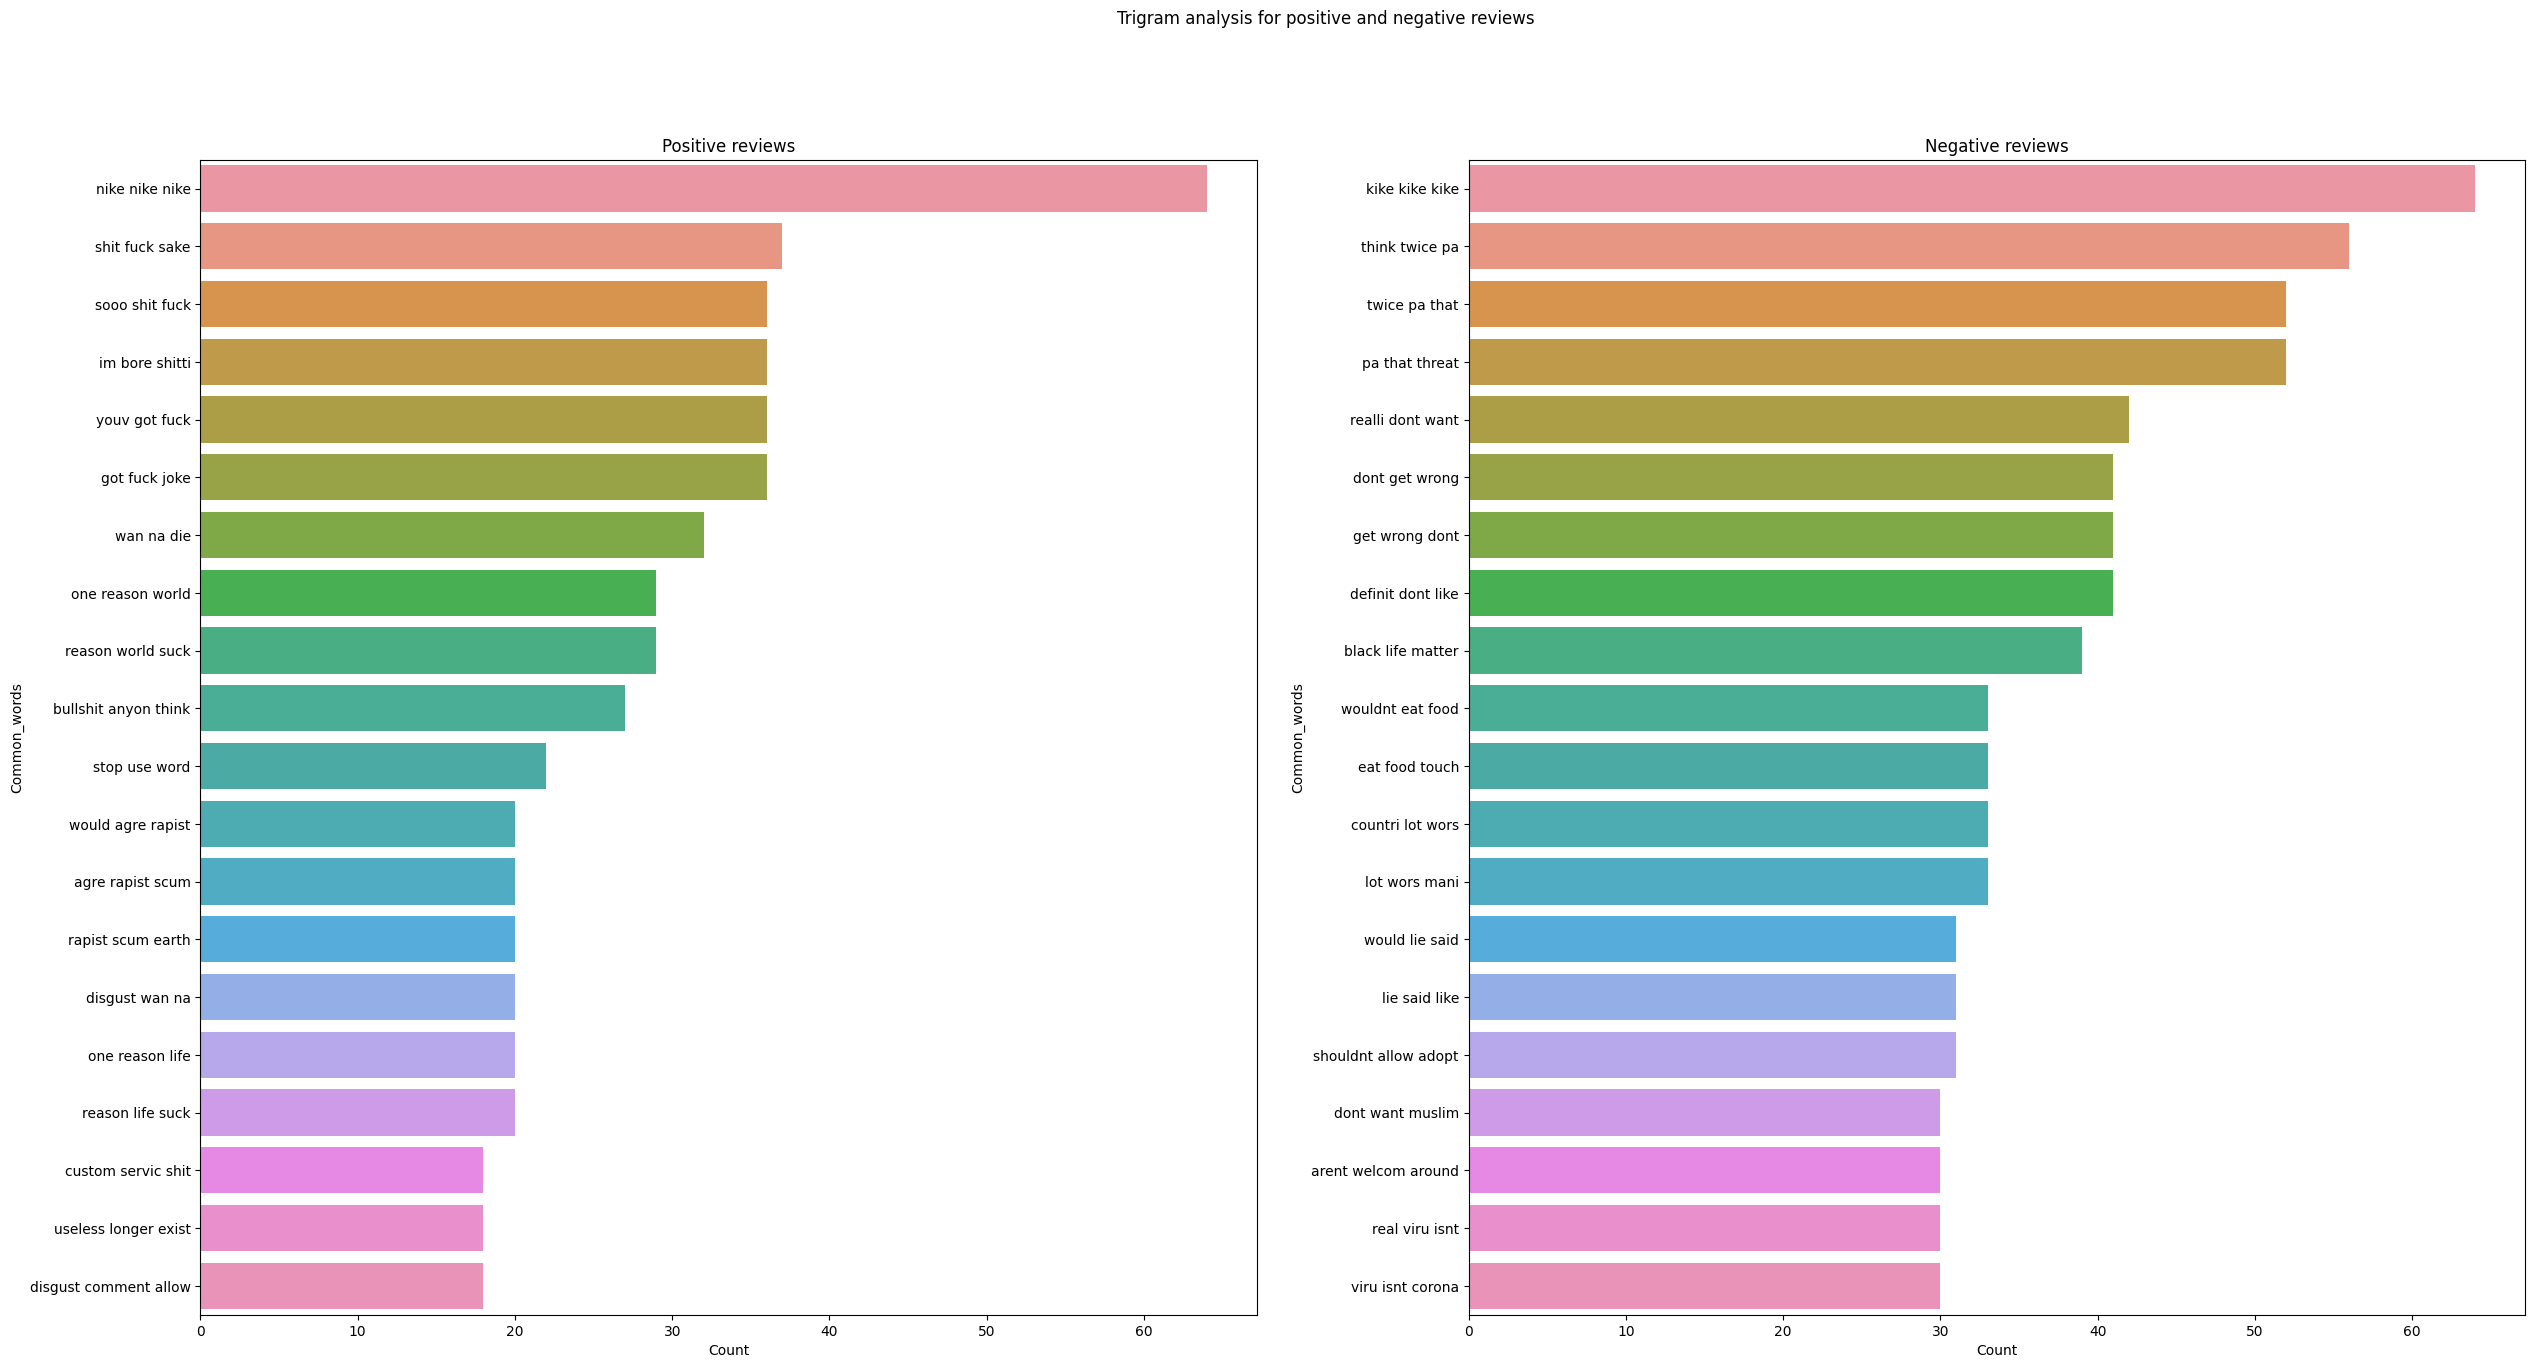

In [32]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()

### 4. Predictive Modelling using Machine Learning

In [33]:

x=df['Cleaned Comments']
y=df['label']

In [34]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(x)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix,y, test_size=0.2, random_state=20)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.77      0.67      4392
           1       0.60      0.40      0.48      3837

    accuracy                           0.60      8229
   macro avg       0.60      0.58      0.57      8229
weighted avg       0.60      0.60      0.58      8229



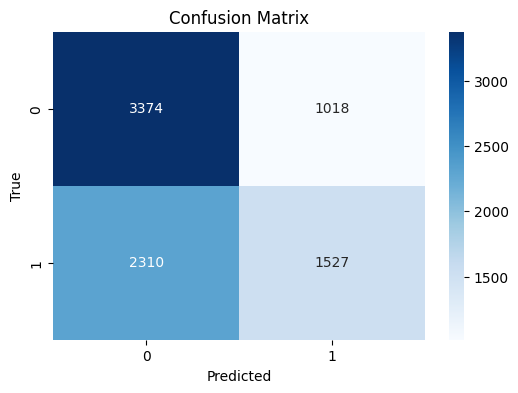

In [36]:
conf_matrix=confusion_matrix(y_test,predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [37]:
# SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, svm_predictions)
classification_rep = classification_report(y_test, svm_predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.59
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      4392
           1       0.56      0.56      0.56      3837

    accuracy                           0.59      8229
   macro avg       0.59      0.59      0.59      8229
weighted avg       0.59      0.59      0.59      8229



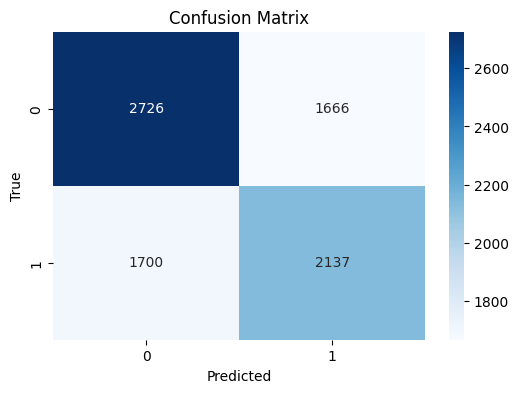

In [39]:
conf_matrix=confusion_matrix(y_test,svm_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [40]:

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predictions=lr.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
accuracy = accuracy_score(y_test, lr_predictions)
classification_rep = classification_report(y_test, lr_predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      4392
           1       0.65      0.61      0.63      3837

    accuracy                           0.67      8229
   macro avg       0.66      0.66      0.66      8229
weighted avg       0.67      0.67      0.67      8229



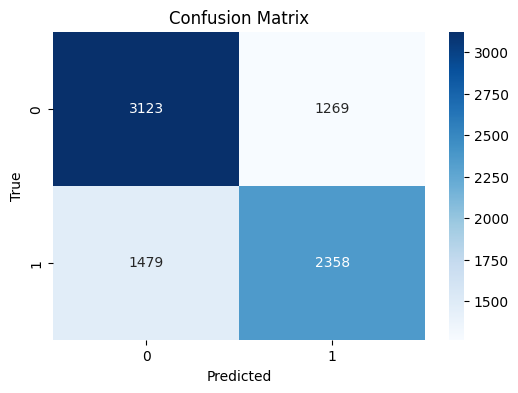

In [42]:
conf_matrix=confusion_matrix(y_test,lr_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [43]:
#XGBoost Model
xgbo = XGBClassifier()
xgbo.fit(X_train,y_train)
xgbo_predictions = xgbo.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, xgbo_predictions)
classification_rep = classification_report(y_test, xgbo_predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      4392
           1       0.67      0.67      0.67      3837

    accuracy                           0.70      8229
   macro avg       0.69      0.69      0.69      8229
weighted avg       0.70      0.70      0.70      8229



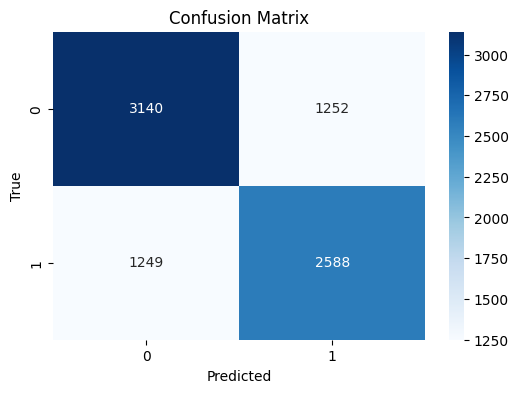

In [45]:
conf_matrix=confusion_matrix(y_test,xgbo_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [46]:
#hyperparameter tuning
Cvalues=[1,2,3]
kernelname=['linear','rbf']
degreevalues=[2,3]
#total models grid will make will be 3*2*2
grid = dict(C=Cvalues,kernel=kernelname,degree=degreevalues)

In [47]:
model = SVC()

In [ ]:
from sklearn.model_selection import GridSearchCV
gridmodel = GridSearchCV(estimator=model,param_grid=grid)
result=gridmodel.fit(X_train,y_train)

In [ ]:
result.cv_results_

In [ ]:
result.best_params_

In [ ]:
result.best_score_